In [14]:
%matplotlib widget

In [2]:
from aware.site.main import Abastumani_AS32
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroplan.target import FixedTarget
from datetime import datetime
from astropy.time import Time
from matplotlib import pyplot as plt
import ligo.skymap.plot
import numpy as np

AWARE config file not found, using the default settings


## Specify target to observe

In [3]:
targets = [
    FixedTarget.from_name(name)
    for name in {"GRB 201015A", "GRB 200829A", "GRB 221009A", "GRB 220306B", "GRB 230205A"}
]

## Find nearest night at AbAO

In [4]:
# date = Time(datetime.now())
date = Time("2023-06-10T21:51:54.874133", format="isot")
start, stop = Abastumani_AS32.nearest_observation_window(date)

## Is target observable by AbAO AS-32?

In [5]:
obs_targets = Abastumani_AS32.observable_targets(targets, start_time=start, end_time=stop)
set(targets) - set(obs_targets)

set()

## Visibility plot

In [6]:
plt.close("all")
ax = Abastumani_AS32.plot_airmass(obs_targets, start_time=start, end_time=stop, fig_path=f"airmass_plots_abao.png")
ax
plt.show()

/tmp/ipykernel_7965/904777112.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [7]:
sorted_targets = Abastumani_AS32.observation_order(obs_targets, start_time=start, end_time=stop, method="nearest")

[<FixedTarget "GRB 201015A" at SkyCoord (ICRS): (ra, dec) in deg (354.318458, 53.416)>]
[<FixedTarget "GRB 201015A" at SkyCoord (ICRS): (ra, dec) in deg (354.318458, 53.416)>, <FixedTarget "GRB 220306B" at SkyCoord (ICRS): (ra, dec) in deg (5.387917, 71.363611)>, <FixedTarget "GRB 230205A" at SkyCoord (ICRS): (ra, dec) in deg (202.070875, 46.725306)>, <FixedTarget "GRB 221009A" at SkyCoord (ICRS): (ra, dec) in deg (288.266042, 19.772972)>, <FixedTarget "GRB 200829A" at SkyCoord (ICRS): (ra, dec) in deg (251.205917, 72.32925)>]
5 5
5 5
5 5
5 5


In [8]:
obs_targets

[<FixedTarget "GRB 220306B" at SkyCoord (ICRS): (ra, dec) in deg (5.387917, 71.363611)>,
 <FixedTarget "GRB 230205A" at SkyCoord (ICRS): (ra, dec) in deg (202.070875, 46.725306)>,
 <FixedTarget "GRB 221009A" at SkyCoord (ICRS): (ra, dec) in deg (288.266042, 19.772972)>,
 <FixedTarget "GRB 200829A" at SkyCoord (ICRS): (ra, dec) in deg (251.205917, 72.32925)>,
 <FixedTarget "GRB 201015A" at SkyCoord (ICRS): (ra, dec) in deg (354.318458, 53.416)>]

In [9]:
sorted_targets

[<FixedTarget "GRB 201015A" at SkyCoord (ICRS): (ra, dec) in deg (354.318458, 53.416)>,
 <FixedTarget "GRB 220306B" at SkyCoord (ICRS): (ra, dec) in deg (5.387917, 71.363611)>,
 <FixedTarget "GRB 200829A" at SkyCoord (ICRS): (ra, dec) in deg (251.205917, 72.32925)>,
 <FixedTarget "GRB 230205A" at SkyCoord (ICRS): (ra, dec) in deg (202.070875, 46.725306)>,
 <FixedTarget "GRB 221009A" at SkyCoord (ICRS): (ra, dec) in deg (288.266042, 19.772972)>]

## Separations from 200829A to 230205A and 221009A

In [10]:
sorted_targets[0].coord.separation(obs_targets[1].coord)

<Angle 77.1103802 deg>

In [13]:
sorted_targets[1].coord.separation(SkyCoord([t.coord for t in sorted_targets[2:]]))

<Angle [30.33118714, 61.31055827, 67.1960171 ] deg>

## Sorted GRBs on the sky

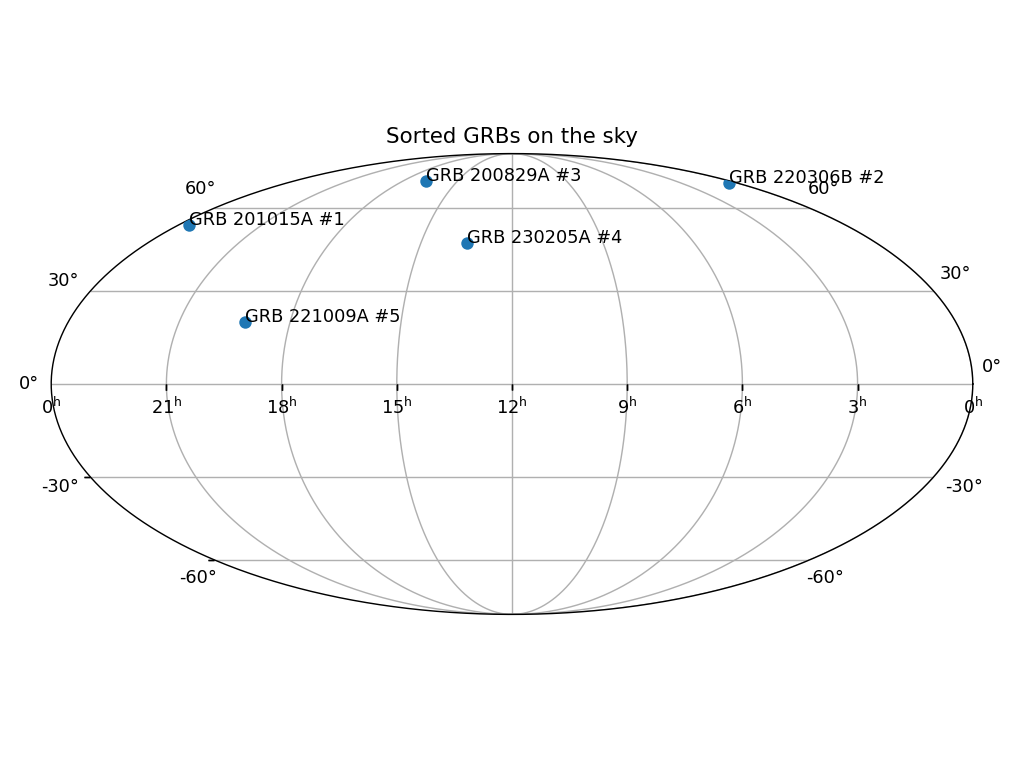

In [15]:
plt.close("all")
fig = plt.figure(figsize=(8, 6), dpi=128)
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9], projection="astro hours mollweide")
ax.plot([t.ra.deg for t in sorted_targets], [t.dec.deg for t in sorted_targets], ls="", 
        transform=ax.get_transform("world"), marker="o")

for i, t in enumerate(sorted_targets):
    ax.text(t.ra.deg, t.dec.deg, f"{t.name} #{i+1}", transform=ax.get_transform("world"))
    
ax.grid(True)
ax.set_title("Sorted GRBs on the sky")
plt.show()